# Chapter 1:

In [1]:
# librairies import
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Exercice 1:

1. If you are given more than two lines and want to find a point x̃ that minimizes the sum of squared distances to each line,

$$ D = \sum_i (\tilde{x} \cdot \tilde{l}_i)^2 $$

    How can you compute this quantity?

`Answer:`
To find a point $\tilde{x}$ who minimize D, we perform three step:
- Transpose $\tilde{x}$
- Put the $(\tilde{x} \cdot \tilde{l}_i)²$ to put it quadratic form
- Find gradient and operate the gradient = 0 to find the minimal $\tilde{x}$

D = 18
Gradient de D = [ 8 14]


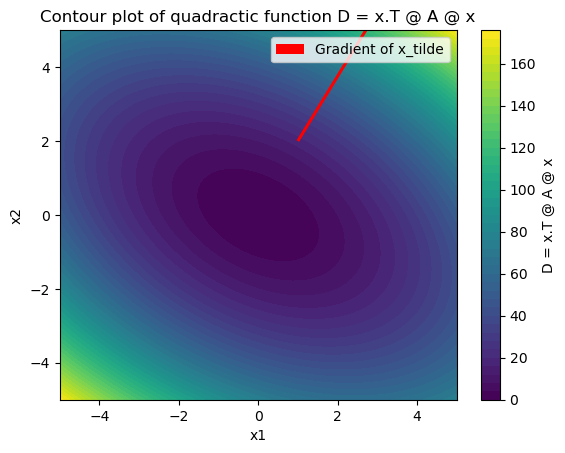

In [8]:
A = np.array([[2, 1],
              [1, 3]])

x_tilde = np.array([1, 2])

D = x_tilde.T @ A @ x_tilde

grad_D = 2 * A @ x_tilde

print(f"D = {D}")
print(f"Gradient de D = {grad_D}")

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

D_values = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        D_values[i, j] = x.T @ A @ x

plt.contourf(X1, X2, D_values, levels=50, cmap='viridis')
plt.colorbar(label='D = x.T @ A @ x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour plot of quadractic function D = x.T @ A @ x')

x_tilde_point = np.array([1, 2])
grad_point = 2 * A @ x_tilde_point

plt.quiver(x_tilde_point[0], x_tilde_point[1], grad_point[0], grad_point[1], 
           angles='xy', scale_units='xy', scale=1, color='red', label='Gradient of x_tilde')
plt.legend()
plt.show()

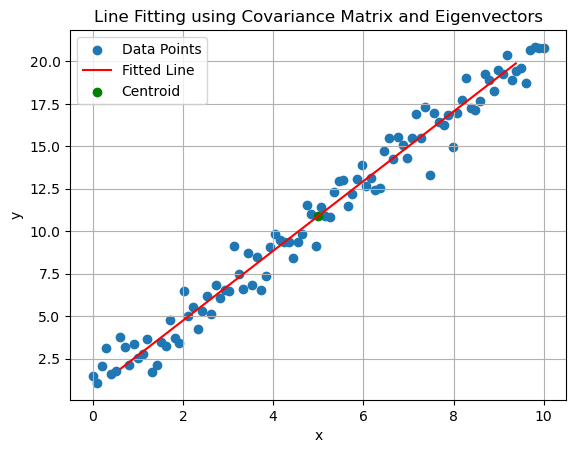

Centroid: [ 5.         10.89615348]
Major Axis (Largest Eigenvector): [0.43805811 0.89894666]


In [7]:
np.random.seed(42)
n_points = 100
x = np.linspace(0, 10, n_points)
y = 2 * x + 1 + np.random.normal(size=n_points)

points = np.vstack((x, y)).T

centroid = np.mean(points, axis=0)

cov_matrix = np.cov(points, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

major_axis = eigenvectors[:, np.argmax(eigenvalues)]

line_points = np.array([centroid + t * major_axis for t in np.linspace(-10, 10, 100)])

plt.scatter(points[:, 0], points[:, 1], label='Data Points')
plt.plot(line_points[:, 0], line_points[:, 1], color='red', label='Fitted Line')
plt.scatter(centroid[0], centroid[1], color='green', marker='o', label='Centroid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Line Fitting using Covariance Matrix and Eigenvectors')
plt.grid(True)
plt.show()

# Output the centroid and major axis
print(f"Centroid: {centroid}")
print(f"Major Axis (Largest Eigenvector): {major_axis}")
